# Author : Nivetha N

## Project  :  US Accidents Data Analysis

### 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Read US Accidents Data set

In [2]:
US_data=pd.read_csv(r'D:\PRACTICE\US_Accidents_Dec20_updated.csv')

In [3]:
US_data.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
US_data.shape

(1516064, 47)

## 1.5 million Rows and 47 Columns presented in this data set

In [5]:
US_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

### int - 1, Float - 13, bool columns - 13, object - 20


In [6]:
US_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


###  highest Temperature is 17 degree faranheat.

### lowest Temperature is -89  degree faranheat.




In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = US_data.select_dtypes(include=numerics)
len(numeric_df.columns)

14

#### Percentage of missing values per column

In [8]:
missing_values =US_data.isna().sum().sort_values(ascending=False)/ len(US_data)
missing_values

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
Sunrise_Sunset           0.000055
Civil_Twilight           0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
City                     0.000055
Country                  0.000000
Give_Way                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Stop                     0.000000
Station                  0.000000
Roundabout    

In [9]:
max(missing_values)

0.6900071500939274

In [10]:
type(missing_values)

pandas.core.series.Series

<AxesSubplot:>

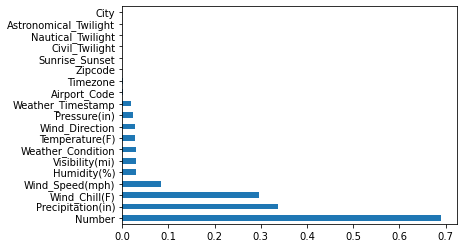

In [11]:
missing_values[missing_values != 0].plot(kind='barh')

In [12]:
US_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
len(US_data.columns)

47

In [14]:
US_data.Country.unique()

array(['US'], dtype=object)

### 47 Columns 

## Exploratory  Analysis and Visualization

 ### Columns we will analyze:
________________________________________
1. City

2. Start time

3. Start Lat, Start Long

4. Temperature

5. Weather_Condition

    

In [15]:
US_data.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [16]:
US_data.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [17]:
unique_cities = US_data.City.unique()
len(unique_cities)                                                 ### no of cities present in US

10658

In [18]:
cities_by_accident = US_data.City.value_counts()
cities_by_accident

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Fulshear           1
Nespelem           1
Dovray             1
Searsmont          1
Pewamo             1
Name: City, Length: 10657, dtype: int64

In [19]:
cities_by_accident[:20]


Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [20]:
'New York' in US_data.State              ## check the new york present in the dataset or not

False

In [21]:
states_of_us=US_data.State.unique()            ## length of states of US
len(states_of_us)

49

In [22]:
States_by_accidents=US_data.State.value_counts()
States_by_accidents

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

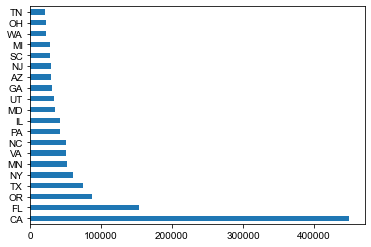

In [23]:
States_by_accidents[:20].plot(kind='barh')
sns.set_style("darkgrid")

###  california state accidents is very high as compared to other states

#### CA(California)  - 4,48,833
#### FL(Florida)       - 1,53,007
#### OR(Oregon)     - 87,484
#### TX(Texas)         - 75,142


In [24]:
US_data.Country.unique()

array(['US'], dtype=object)

### 49 States Records Presented in this Dataset

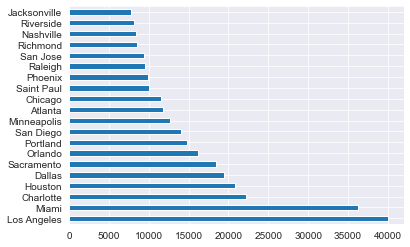

In [25]:
cities_by_accident[:20].plot(kind='barh')
sns.set_style("darkgrid")

In [26]:
sns.set_style("darkgrid")

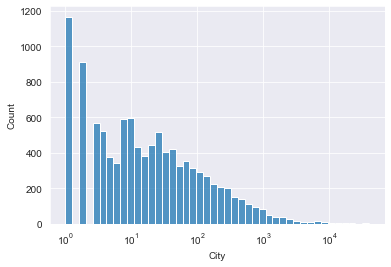

In [27]:
sns.histplot(cities_by_accident,log_scale=True)
plt.show()

###  Here we can see that most of the accidents were happened between 0 to 100 accidents

In [28]:
high_accident_cities=cities_by_accident[cities_by_accident >= 1000]
low_accident_cities=cities_by_accident[cities_by_accident < 1000]

In [29]:
len(high_accident_cities)/len(cities_by_accident)

0.02355259453880079

In [30]:
len(low_accident_cities)/len(cities_by_accident)

0.9764474054611992

C:\Users\NIVETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

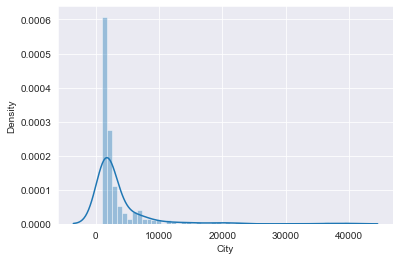

In [31]:
sns.distplot(high_accident_cities)

C:\Users\NIVETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

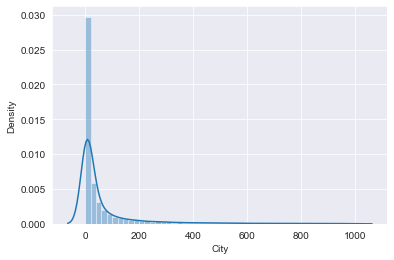

In [32]:
sns.distplot(low_accident_cities)

In [33]:
b=cities_by_accident[cities_by_accident == 1]                  #### Over 1167 cities have reported just one accident
len(b)

1167

In [34]:
US_data.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [35]:
US_data.Start_Time[0]             

'2016-02-08 00:37:08'

In [36]:
US_data.Start_Time = pd.to_datetime(US_data.Start_Time)

In [37]:
US_data.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

C:\Users\NIVETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

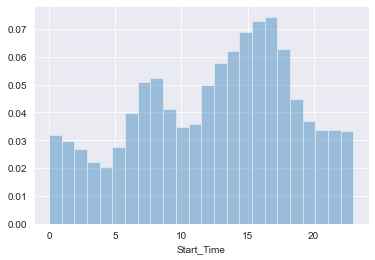

In [38]:
sns.distplot(US_data.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)


##### A high percentage of accidents occur between 12 pm to 4 pm , Next higest percentage is 5 am to 6 am (probaly people hurry to get to work).

<AxesSubplot:xlabel='Start_Time'>

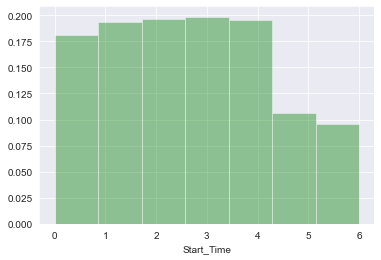

In [39]:
sns.distplot(US_data.Start_Time.dt.dayofweek, bins=7, kde=False,color="g",norm_hist=True)

C:\Users\NIVETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

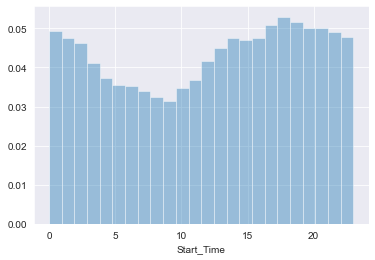

In [40]:
sundays_start_time = US_data.Start_Time[ US_data.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\NIVETHA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

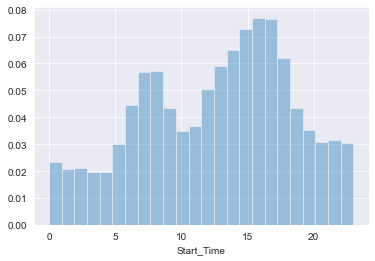

In [41]:
monday_start_time = US_data.Start_Time[US_data.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

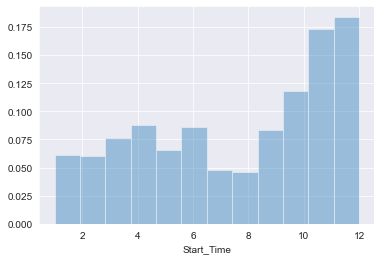

In [42]:
sns.distplot(monday_start_time.dt.month,bins=12,kde=False,norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

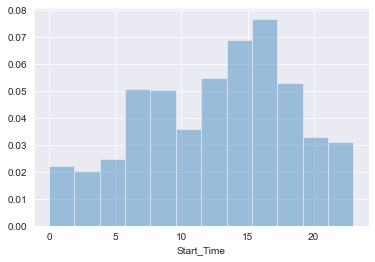

In [43]:
sns.distplot(monday_start_time.dt.hour,bins=12,kde=False,norm_hist=True)

In [44]:
len_state=US_data.State.unique()
len_state

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [45]:
len(len_state)

49

In [46]:
US_data.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [47]:
US_data.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

In [48]:
sample_df = US_data.sample(int(0.1 * len(US_data)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

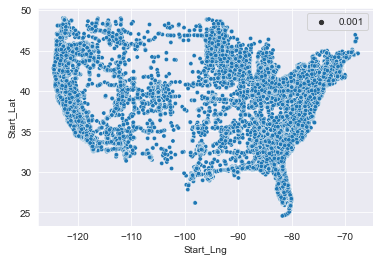

In [49]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [50]:
!pip install folium

In [51]:
import folium

In [52]:
lat_lon = US_data.Start_Lat[0], US_data.Start_Lng[0]
lat_lon

(40.10891, -83.09286)

In [53]:

zip(list(US_data.Start_Lat), list(US_data.Start_Lng))

In [54]:
from folium.plugins import HeatMap

In [67]:
sample_df = US_data.sample(int(0.001 * len(US_data)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [68]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [57]:
import folium
from folium import plugins

In [58]:
US_data.Weather_Condition

0             Light Rain
1             Light Rain
2               Overcast
3               Overcast
4               Overcast
               ...      
1516059             Fair
1516060             Fair
1516061    Partly Cloudy
1516062             Fair
1516063             Fair
Name: Weather_Condition, Length: 1516064, dtype: object

In [59]:
US_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [60]:
US_data.Wind_Direction

0            SW
1          Calm
2          Calm
3          Calm
4          Calm
           ... 
1516059       W
1516060      SW
1516061     SSW
1516062      SW
1516063      SW
Name: Wind_Direction, Length: 1516064, dtype: object

In [61]:
US_data.Description

0          Between Sawmill Rd/Exit 20 and OH-315/Olentang...
1                         At OH-4/OH-235/Exit 41 - Accident.
2                           At I-71/US-50/Exit 1 - Accident.
3                           At I-71/US-50/Exit 1 - Accident.
4                            At Dart Ave/Exit 21 - Accident.
                                 ...                        
1516059                             At Market St - Accident.
1516060      At Camino Del Rio/Mission Center Rd - Accident.
1516061    At Glassell St/Grand Ave - Accident. in the ri...
1516062       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
1516063                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 1516064, dtype: object

### Ask & answer questions
#### Are there more accidents in warmer or colder areas?
#### Which 5 states have the highest number of accidents? How about per capita?
#### Does New York show up in the data? If yes, why is the count lower if this the most populated city.
#### Among the top 100 cities in number of accidents, which states do they belong to most frequently.
#### What time of the day are accidents most frequent in? 
#### Which days of the week have the most accidents?
#### Which months have the most accidents?
#### What is the trend of accidents year over year (decreasing/increasing?)
#### When is accidents per unit of traffic the highest.

### Conclusion

#### No data from New York
#### The number of accidents per city decreases exponentially
#### Less than 2% of cities have more than 1000 yearly accidents.
#### 97% of cities have less than 1000 yearly accidents.
#### Over 1167 cities have reported just one accident (need to investigate)